In [2]:
import csv
with open('Kiruthika M - spam.csv',mode='r')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        print(lines)

['v1', 'v2', '', '', '']
['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', '', '', '']
['ham', 'Ok lar... Joking wif u oni...', '', '', '']
['spam', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", '', '', '']
['ham', 'U dun say so early hor... U c already then say...', '', '', '']
['ham', "Nah I don't think he goes to usf, he lives around here though", '', '', '']
['spam', "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv", '', '', '']
['ham', 'Even my brother is not like to speak with me. They treat me like aids patent.', '', '', '']
['ham', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", '',

In [6]:
import pandas as pd
df = pd.read_csv('Kiruthika M - spam.csv', encoding = 'latin1')

In [7]:
df.describe()

v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2

In [8]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer

In [9]:
with open('Kiruthika M - spam.csv','r',encoding='latin1') as file:
    text = file.read()
sent_tokenizer = PunktSentenceTokenizer(text)
sents_1 = sent_tokenizer.tokenize(text)
print(sents_1)

['v1,v2,,,\nham,"Go until jurong point, crazy..', 'Available only in bugis n great world la e buffet...', 'Cine there got amore wat...",,,\nham,Ok lar...', 'Joking wif u oni...,,,\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.', 'Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\nham,U dun say so early hor... U c already then say...,,,\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back!', "I'd like some fun you up for it still?", 'Tb ok!', 'XxX std chgs to send, å£1.50 to rcv",,,\nham,Even my brother is not like to speak with me.', "They treat me like aids patent.,,,\nham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers.", 'Press *9 to copy your friends Callertune,,,\nspam,WINNER!!', 'As a valued network customer you have been selected to receivea å£900

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stops = set(stopwords.words('english'))
[word for word in sents_1 if word not in english_stops]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['v1,v2,,,\nham,"Go until jurong point, crazy..',
 'Available only in bugis n great world la e buffet...',
 'Cine there got amore wat...",,,\nham,Ok lar...',
 'Joking wif u oni...,,,\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.',
 'Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\nham,U dun say so early hor... U c already then say...,,,\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back!',
 "I'd like some fun you up for it still?",
 'Tb ok!',
 'XxX std chgs to send, å£1.50 to rcv",,,\nham,Even my brother is not like to speak with me.',
 "They treat me like aids patent.,,,\nham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers.",
 'Press *9 to copy your friends Callertune,,,\nspam,WINNER!!',
 'As a valued network customer you have been selected to rece

In [11]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')      # still needed for sentence tokenization
nltk.download('stopwords')  # if using stopwords
nltk.download('wordnet')    # if using lemmatization
nltk.download('omw-1.4')    # for WordNet multilingual data


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Surface\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Surface\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surface\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Surface\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Surface\AppData\Roaming\nltk_data...


True

In [13]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
Porter_stemmer = PorterStemmer()
all_stemmed_words = []
for text in sents_1:
    if isinstance(text,str):
        words = word_tokenize(text)
        stemmed_words = [Porter_stemmer.stem(word) for word in words]
        all_stemmed_words.extend(stemmed_words)
for stemmed in all_stemmed_words:
    print(stemmed)

v1
,
v2
,
,
,
ham
,
''
go
until
jurong
point
,
crazi
..
avail
onli
in
bugi
n
great
world
la
e
buffet
...
cine
there
got
amor
wat
...
''
,
,
,
ham
,
ok
lar
...
joke
wif
u
oni
...
,
,
,
spam
,
free
entri
in
2
a
wkli
comp
to
win
fa
cup
final
tkt
21st
may
2005
.
text
fa
to
87121
to
receiv
entri
question
(
std
txt
rate
)
t
&
c
's
appli
08452810075over18
's
,
,
,
ham
,
u
dun
say
so
earli
hor
...
u
c
alreadi
then
say
...
,
,
,
ham
,
''
nah
i
do
n't
think
he
goe
to
usf
,
he
live
around
here
though
''
,
,
,
spam
,
''
freemsg
hey
there
darl
it
's
been
3
week
's
now
and
no
word
back
!
i
'd
like
some
fun
you
up
for
it
still
?
tb
ok
!
xxx
std
chg
to
send
,
å£1.50
to
rcv
''
,
,
,
ham
,
even
my
brother
is
not
like
to
speak
with
me
.
they
treat
me
like
aid
patent.
,
,
,
ham
,
as
per
your
request
'mell
mell
(
oru
minnaminungint
nurungu
vettam
)
'
ha
been
set
as
your
callertun
for
all
caller
.
press
*
9
to
copi
your
friend
callertun
,
,
,
spam
,
winner
!
!
as
a
valu
network
custom
you
have
been
select
t

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
all_lemmed_words = []
for text in sents_1:
    if isinstance(text,str):
        words = word_tokenize(text)
        stemmed_words = [lemmatizer.lemmatize(word) for word in words]
        all_lemmed_words.extend(stemmed_words)
for lemmed in all_lemmed_words:
    print(lemmed)

v1
,
v2
,
,
,
ham
,
''
Go
until
jurong
point
,
crazy
..
Available
only
in
bugis
n
great
world
la
e
buffet
...
Cine
there
got
amore
wat
...
''
,
,
,
ham
,
Ok
lar
...
Joking
wif
u
oni
...
,
,
,
spam
,
Free
entry
in
2
a
wkly
comp
to
win
FA
Cup
final
tkts
21st
May
2005
.
Text
FA
to
87121
to
receive
entry
question
(
std
txt
rate
)
T
&
C
's
apply
08452810075over18
's
,
,
,
ham
,
U
dun
say
so
early
hor
...
U
c
already
then
say
...
,
,
,
ham
,
''
Nah
I
do
n't
think
he
go
to
usf
,
he
life
around
here
though
''
,
,
,
spam
,
''
FreeMsg
Hey
there
darling
it
's
been
3
week
's
now
and
no
word
back
!
I
'd
like
some
fun
you
up
for
it
still
?
Tb
ok
!
XxX
std
chgs
to
send
,
å£1.50
to
rcv
''
,
,
,
ham
,
Even
my
brother
is
not
like
to
speak
with
me
.
They
treat
me
like
aid
patent.
,
,
,
ham
,
As
per
your
request
'Melle
Melle
(
Oru
Minnaminunginte
Nurungu
Vettam
)
'
ha
been
set
a
your
callertune
for
all
Callers
.
Press
*
9
to
copy
your
friend
Callertune
,
,
,
spam
,
WINNER
!
!
As
a
valued
network
customer


In [15]:
all_lowered_words = []
for text in sents_1:
    if isinstance(text,str):
        words = word_tokenize(text)
        lower_words = [word.lower() for word in words]
        all_lowered_words.extend(lower_words)
for lowered in all_lowered_words:
    print(lowered)

v1
,
v2
,
,
,
ham
,
''
go
until
jurong
point
,
crazy
..
available
only
in
bugis
n
great
world
la
e
buffet
...
cine
there
got
amore
wat
...
''
,
,
,
ham
,
ok
lar
...
joking
wif
u
oni
...
,
,
,
spam
,
free
entry
in
2
a
wkly
comp
to
win
fa
cup
final
tkts
21st
may
2005
.
text
fa
to
87121
to
receive
entry
question
(
std
txt
rate
)
t
&
c
's
apply
08452810075over18
's
,
,
,
ham
,
u
dun
say
so
early
hor
...
u
c
already
then
say
...
,
,
,
ham
,
''
nah
i
do
n't
think
he
goes
to
usf
,
he
lives
around
here
though
''
,
,
,
spam
,
''
freemsg
hey
there
darling
it
's
been
3
week
's
now
and
no
word
back
!
i
'd
like
some
fun
you
up
for
it
still
?
tb
ok
!
xxx
std
chgs
to
send
,
å£1.50
to
rcv
''
,
,
,
ham
,
even
my
brother
is
not
like
to
speak
with
me
.
they
treat
me
like
aids
patent.
,
,
,
ham
,
as
per
your
request
'melle
melle
(
oru
minnaminunginte
nurungu
vettam
)
'
has
been
set
as
your
callertune
for
all
callers
.
press
*
9
to
copy
your
friends
callertune
,
,
,
spam
,
winner
!
!
as
a
valued
network
cu

In [16]:
from collections import Counter
stemmed_token_counts = Counter(all_stemmed_words)
print("Stemmed Token Counts:")
for token, count in sorted(stemmed_token_counts.items()):
    print(f"{token}: {count}")

Stemmed Token Counts:
!: 1397
#: 287
$: 23
%: 10
&: 922
': 44
'': 3060
'an: 1
'anyth: 1
'comfort: 1
'd: 27
'doctor: 1
'heart: 1
'help: 4
'hex: 1
'hw: 2
'if: 1
'it: 1
'll: 232
'luxuri: 1
'm: 395
'maangalyam: 2
'marri: 1
'mell: 3
'need: 1
're: 90
'rencontr: 1
's: 496
'simpl: 2
'taxless: 1
'terrorist: 2
'that: 1
'til: 3
'uptown: 1
've: 91
'wnevr: 1
'xam: 1
(: 119
): 499
*: 311
+: 29
+123: 2
+447797706009: 2
+449071512431: 1
+cheer: 1
+get: 1
+std: 2
+å£400: 1
,: 24120
,s: 1
-: 226
--: 9
-.: 3
-/: 1
-4: 1
-appl: 1
-call: 1
-d: 5
-db-: 1
-messag: 2
-msg: 1
-no: 1
-p: 4
-pl: 1
-shakespeare-: 1
-sub: 2
-the: 1
-tho: 1
-u: 1
-via: 1
-vivekanand-: 1
-xx: 1
-|: 1
.: 3980
..: 697
...: 1146
....: 56
.....: 14
......: 2
........: 2
.........: 2
..........: 2
...........: 3
...............: 1
................: 1
..................: 1
.a: 1
.after: 1
.be: 2
.bi: 1
.call: 1
.dont: 1
.gud: 2
.irrit: 1
.joker: 1
.lovabl: 1
.nt: 1
.pleas: 1
.so: 1
.terry\: 1
.veri: 2
/: 10
/-: 1
//alto18.co.uk/wave/wave.

In [18]:
import pandas as pd

# Load and clean dataset
df = pd.read_csv('Kiruthika M - spam.csv', encoding='latin1')[['v1', 'v2']]
df.columns = ['label', 'message']

# Define slang/abbreviation mapping
word_map = {
    'u': 'you',
    'ur': 'your',
    'urs': 'yours',
    'pls': 'please',
    'plz': 'please',
    'msg': 'message',
    'txt': 'text',
    'bday': 'birthday',
    'im': 'i am',
    'dont': "don't",
    'wont': "won't",
    'tnc': 'terms and conditions'
}

# Word replacer class (from Lab PPT style)
class word_syn_replacer(object):
    def __init__(self, word_map):
        self.word_map = word_map
    
    def replace(self, word):
        return self.word_map.get(word.lower(), word)

# Create replacer instance
rep_syn = word_syn_replacer(word_map)

# Function to replace words in a message
def replace_words_in_message(message):
    tokens = message.split()
    replaced_tokens = [rep_syn.replace(token) for token in tokens]
    return " ".join(replaced_tokens)

# Apply to the whole dataset
df['cleaned_message'] = df['message'].apply(replace_words_in_message)

# Show before/after for first 5 messages
print("Before Replacement:\n", df['message'].head(), "\n")
print("After Replacement:\n", df['cleaned_message'].head())


Before Replacement:
 0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object 

After Replacement:
 0    Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif you oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    you dun say so early hor... you c already then...
4    Nah I don't think he goes to usf, he lives aro...
Name: cleaned_message, dtype: object


In [23]:
from nltk.tree import Tree
from nltk import word_tokenize, pos_tag

# Pick one spam message
sample_spam = df[df['label'] == 'spam']['message'].iloc[0]
print("📩 Spam Message:", sample_spam)

# Tokenize and tag
tokens = word_tokenize(sample_spam)
tags = pos_tag(tokens)

# Example manual parse tree for the first few words
# (You can adjust according to grammar rules)
left = Tree('NP', [Tree('DT', [tokens[0]]), Tree('NN', [tokens[1]])])
right = Tree('VP', [Tree('VB', [tokens[2]]), Tree('NP', [Tree('DT', [tokens[3]]), Tree('NN', [tokens[4]])])])
tree = Tree('S', [left, right])

# Print and pretty display
print("\nParse Tree Structure:")
print(tree)
tree.pretty_print()


📩 Spam Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Parse Tree Structure:
(S (NP (DT Free) (NN entry)) (VP (VB in) (NP (DT 2) (NN a))))
                S             
       _________|___           
      |             VP        
      |          ___|___       
      NP        |       NP    
  ____|____     |    ___|___   
 DT        NN   VB  DT      NN
 |         |    |   |       |  
Free     entry  in  2       a 



In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Show first few rows to check structure
print(df.head())

# Assuming columns are 'text' and 'label' (spam/ham)
# If column names are different, I'll adjust accordingly after checking

# Split features and labels
X = df['message']        # feature: text messages
y = df['label']          # target: spam/ham labels

# Print label distribution to verify
print("Label distribution:\n", y.value_counts(),"\n")

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  Go until jurong point, crazy.. Available only ...  
1                    Ok lar... Joking wif you oni...  
2  Free entry in 2 a wkly comp to win FA Cup fina...  
3  you dun say so early hor... you c already then...  
4  Nah I don't think he goes to usf, he lives aro...  
Label distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64 

Training samples: 4457
Testing samples: 1115


In [38]:
!pip install matplotlib seaborn wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


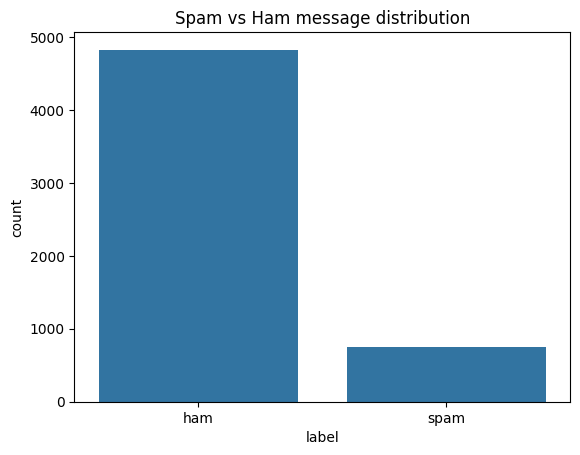

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of classes
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham message distribution')
plt.show()


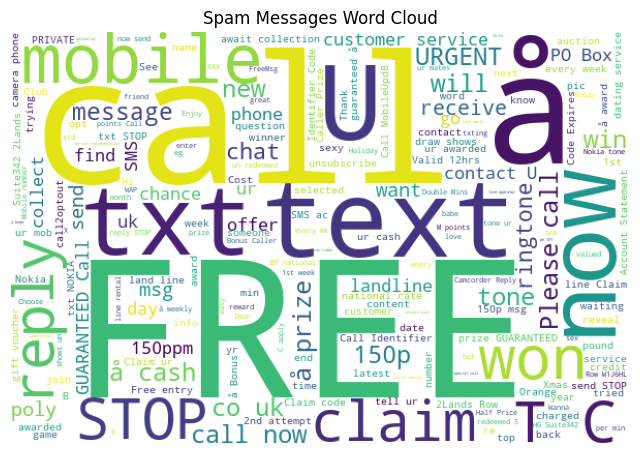

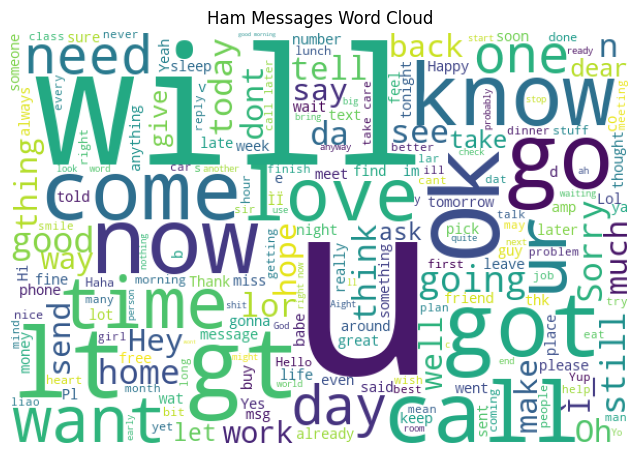

In [40]:
from wordcloud import WordCloud

# Separate spam and ham messages
spam_text = " ".join(df[df['label'] == 'spam']['message'])
ham_text = " ".join(df[df['label'] == 'ham']['message'])

# Word cloud for spam
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(8,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Spam Messages Word Cloud')
plt.show()

# Word cloud for ham
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_text)
plt.figure(figsize=(8,6))
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Ham Messages Word Cloud')
plt.show()


In [43]:
print("Top 20 stemmed tokens by frequency:")
for token, count in stemmed_token_counts.most_common(20):
    print(f"{token}: {count}")


Top 20 stemmed tokens by frequency:
,: 24120
ham: 4810
.: 3980
'': 3060
i: 2910
to: 2251
you: 2215
?: 1550
a: 1437
!: 1397
the: 1335
u: 1155
...: 1146
and: 978
it: 938
&: 922
is: 904
in: 890
me: 781
;: 768


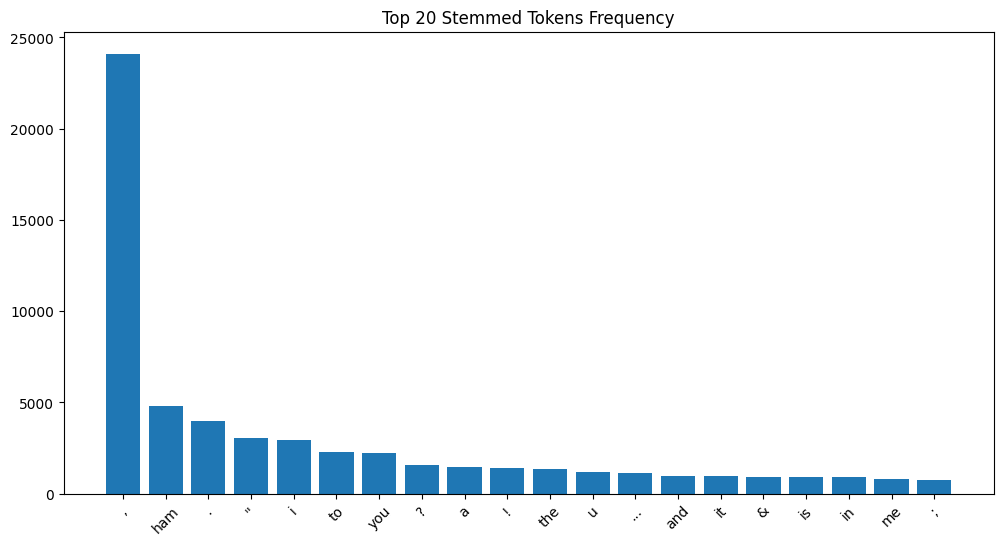

In [44]:
import matplotlib.pyplot as plt

top_tokens = stemmed_token_counts.most_common(20)
tokens, counts = zip(*top_tokens)

plt.figure(figsize=(12,6))
plt.bar(tokens, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Stemmed Tokens Frequency")
plt.show()


In [46]:
from collections import Counter
import re

# Simple tokenizer example (customize as needed)
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Separate spam and ham messages
spam_messages = df[df['label'] == 'spam']['message']
ham_messages = df[df['label'] == 'ham']['message']

# Tokenize all spam and ham messages
spam_tokens = []
for msg in spam_messages:
    spam_tokens.extend(tokenize(msg))

ham_tokens = []
for msg in ham_messages:
    ham_tokens.extend(tokenize(msg))

# Count tokens
spam_token_counts = Counter(spam_tokens)
ham_token_counts = Counter(ham_tokens)

# Vocabulary is the union of all tokens
vocab = set(spam_token_counts.keys()).union(set(ham_token_counts.keys()))


In [47]:
num_spam = len(spam_messages)
num_ham = len(ham_messages)
total_messages = num_spam + num_ham

prior_spam = num_spam / total_messages
prior_ham = num_ham / total_messages


In [48]:
# Total count of words in each class
total_spam_words = sum(spam_token_counts.values())
total_ham_words = sum(ham_token_counts.values())

V = len(vocab)  # vocabulary size

def word_likelihood(word, label):
    if label == 'spam':
        # count of word in spam + 1 (Laplace smoothing)
        count = spam_token_counts.get(word, 0) + 1
        return count / (total_spam_words + V)
    else:
        count = ham_token_counts.get(word, 0) + 1
        return count / (total_ham_words + V)


In [49]:
import math

def predict(message):
    tokens = tokenize(message)
    # Initialize log probabilities with log priors
    log_prob_spam = math.log(prior_spam)
    log_prob_ham = math.log(prior_ham)

    for token in tokens:
        log_prob_spam += math.log(word_likelihood(token, 'spam'))
        log_prob_ham += math.log(word_likelihood(token, 'ham'))

    if log_prob_spam > log_prob_ham:
        return 'spam'
    else:
        return 'ham'


In [50]:
test_msg = "Congratulations! You have won a free ticket."
print(f"Prediction: {predict(test_msg)}")


Prediction: spam


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict function already defined: predict(message)

# Apply prediction on test set
y_pred = X_test.apply(predict)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')
cm = confusion_matrix(y_test, y_pred, labels=['spam', 'ham'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (spam): {precision:.4f}")
print(f"Recall (spam): {recall:.4f}")
print(f"F1 Score (spam): {f1:.4f}")

print("\nConfusion Matrix (rows: true, cols: predicted):")
print(pd.DataFrame(cm, index=['True Spam', 'True Ham'], columns=['Pred Spam', 'Pred Ham']))


Accuracy: 0.9901
Precision (spam): 0.9600
Recall (spam): 0.9664
F1 Score (spam): 0.9632

Confusion Matrix (rows: true, cols: predicted):
           Pred Spam  Pred Ham
True Spam        144         5
True Ham           6       960


In [52]:
import pandas as pd

# Convert spam token counts to DataFrame and save
spam_df = pd.DataFrame(spam_token_counts.items(), columns=['token', 'count'])
spam_df.to_csv('spam_token_counts.csv', index=False)

# Convert ham token counts to DataFrame and save
ham_df = pd.DataFrame(ham_token_counts.items(), columns=['token', 'count'])
ham_df.to_csv('ham_token_counts.csv', index=False)

# Save vocabulary list (all unique tokens)
with open('vocabulary.txt', 'w') as f:
    for token in sorted(vocab):
        f.write(token + '\n')

print("Vocabulary and token counts saved to files!")


Vocabulary and token counts saved to files!


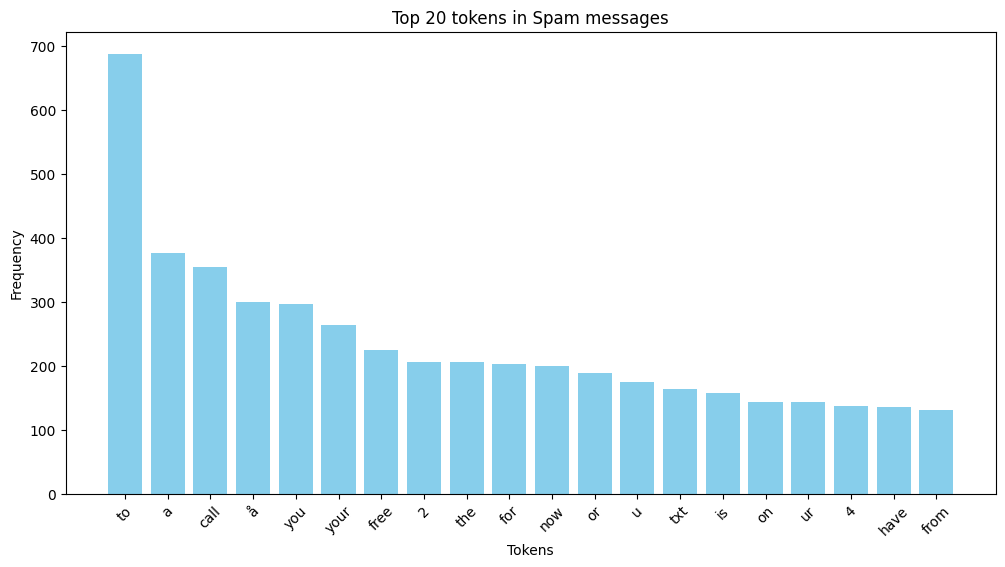

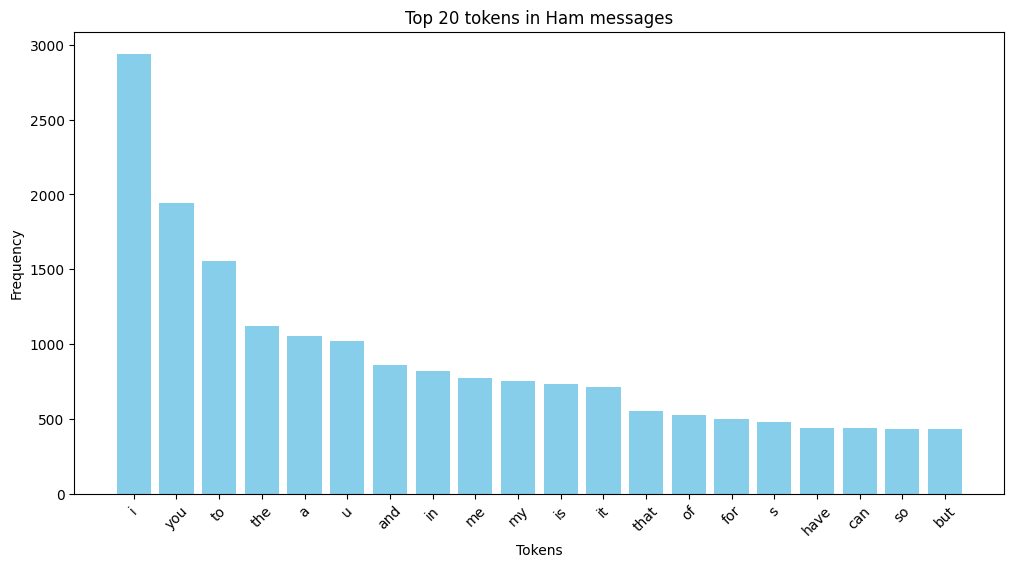

In [53]:
import matplotlib.pyplot as plt

def plot_top_tokens(token_counts, label, top_n=20):
    most_common = token_counts.most_common(top_n)
    tokens, counts = zip(*most_common)
    
    plt.figure(figsize=(12,6))
    plt.bar(tokens, counts, color='skyblue')
    plt.xticks(rotation=45)
    plt.title(f"Top {top_n} tokens in {label} messages")
    plt.xlabel("Tokens")
    plt.ylabel("Frequency")
    plt.show()

# Plot top tokens for spam and ham
plot_top_tokens(spam_token_counts, 'Spam')
plot_top_tokens(ham_token_counts, 'Ham')


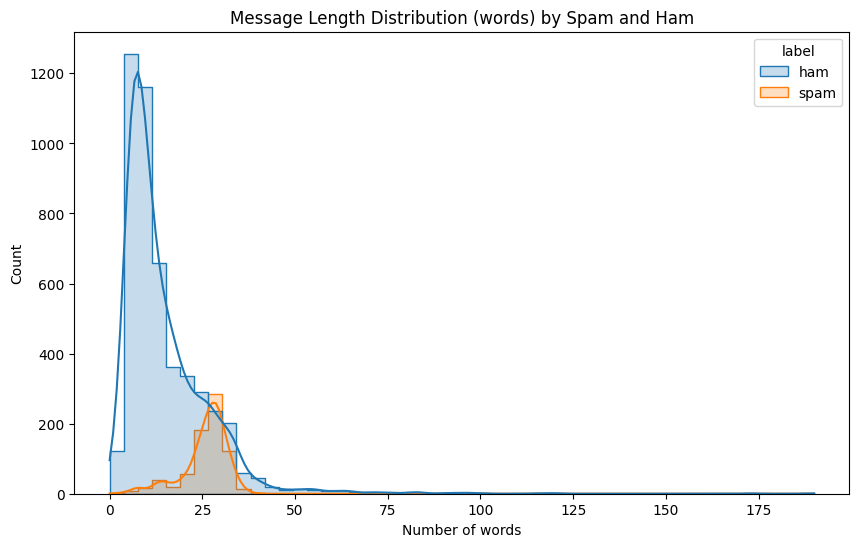

In [54]:
import seaborn as sns

# Calculate message lengths
df['message_length'] = df['message'].apply(lambda x: len(tokenize(x)))

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, element="step")
plt.title("Message Length Distribution (words) by Spam and Ham")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()


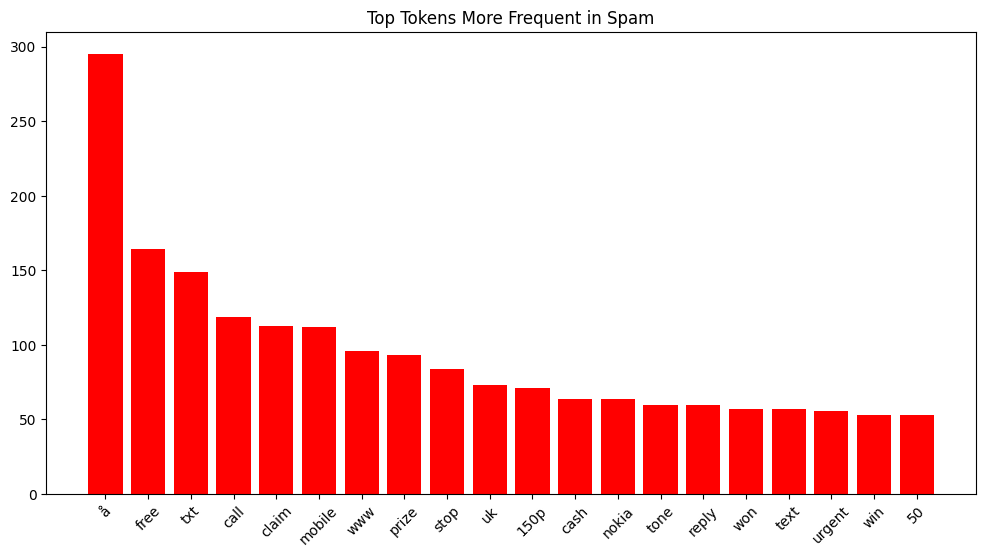

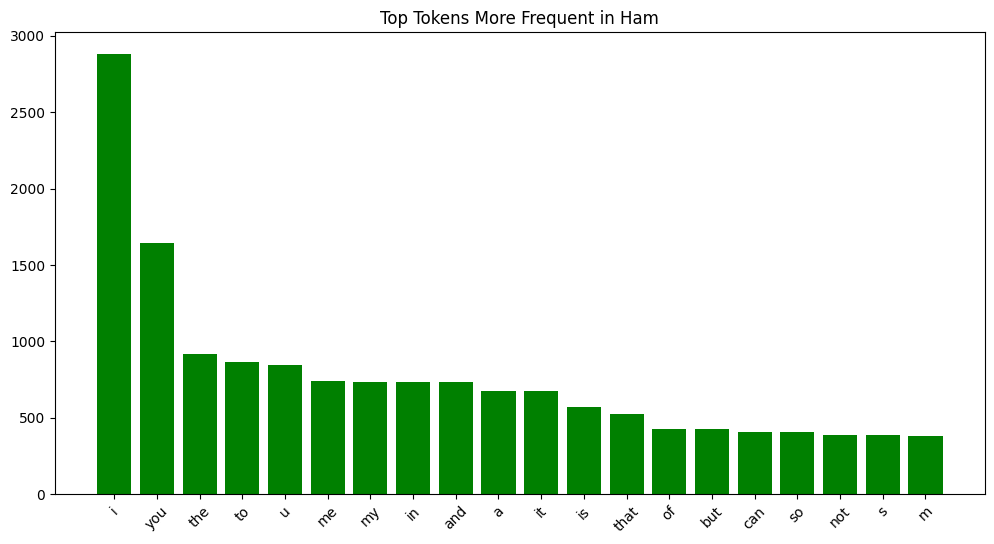

In [55]:
import pandas as pd

# Create a DataFrame comparing token counts
tokens = list(vocab)
spam_counts = [spam_token_counts.get(t, 0) for t in tokens]
ham_counts = [ham_token_counts.get(t, 0) for t in tokens]

token_df = pd.DataFrame({
    'token': tokens,
    'spam_count': spam_counts,
    'ham_count': ham_counts
})

# Filter tokens that appear at least 10 times in either category
token_df = token_df[(token_df['spam_count'] + token_df['ham_count']) >= 10]

# Calculate difference
token_df['difference'] = token_df['spam_count'] - token_df['ham_count']

# Top tokens more frequent in spam
top_spam_tokens = token_df.sort_values(by='difference', ascending=False).head(20)

# Top tokens more frequent in ham
top_ham_tokens = token_df.sort_values(by='difference').head(20)

# Plot tokens more frequent in spam
plt.figure(figsize=(12,6))
plt.bar(top_spam_tokens['token'], top_spam_tokens['difference'], color='red')
plt.xticks(rotation=45)
plt.title("Top Tokens More Frequent in Spam")
plt.show()

# Plot tokens more frequent in ham
plt.figure(figsize=(12,6))
plt.bar(top_ham_tokens['token'], -top_ham_tokens['difference'], color='green')
plt.xticks(rotation=45)
plt.title("Top Tokens More Frequent in Ham")
plt.show()
